In [7]:
import pandas as pd
import os
import category_encoders as ce
import joblib


In [2]:
os.chdir("../")

In [3]:
df = pd.read_csv("data/raw/train.csv")

### Item Identifier 

In [4]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [4]:
encoder = ce.TargetEncoder(cols=['Item_Identifier'])
df['Item_Identifier_encoded'] = encoder.fit_transform(df['Item_Identifier'], df['Item_Outlet_Sales'])

In [5]:
df['Item_Identifier_encoded'] = df['Item_Identifier_encoded'].astype('int')

In [6]:
df[['Item_Identifier', 'Item_Identifier_encoded']]

,Item_Identifier,Item_Identifier_encoded
0,FDA15,2879
1,DRC01,1920
2,FDN15,2030
3,FDX07,2347
4,NCD19,1879
...,...,...
8518,FDF22,2424
8519,FDS36,2271
8520,NCJ29,1991
8521,FDN46,2158


In [11]:

os.makedirs("artifacts/encoders", exist_ok=True)

joblib.dump(encoder, 'artifacts/encoders/item_identifier_encoder.pkl')

['artifacts/encoders/item_identifier_encoder.pkl']

### Item Type

In [13]:
src_column = 'Item_Type'
target_column = f'{src_column}_encoded'
encoder = ce.TargetEncoder(cols=[src_column])
df[target_column] = encoder.fit_transform(df[src_column], df['Item_Outlet_Sales'])
df[target_column] = df[target_column].astype('int')
df[[src_column, target_column]]

joblib.dump(encoder, 'artifacts/encoders/item_type_encoder.pkl')

['artifacts/encoders/item_type_encoder.pkl']

In [14]:
test_df = df[src_column]

In [15]:
encoder.transform(test_df)

,Item_Type
0,2232.542597
1,2006.511735
2,2158.977911
3,2289.009592
4,2258.784300
...,...
8518,2277.321739
8519,1952.971207
8520,2010.000265
8521,2277.321739


In [12]:
joblib.dump(encoder, 'artifacts/encoders/item_type_encoder.pkl')

['artifacts/encoders/item_type_encoder.pkl']

### Item_Fat_Content

In [9]:
src_column = 'Item_Fat_Content'
target_column = f'{src_column}_encoded'
df[target_column] = df[src_column].map({
    'Low Fat': "LF",
    'Regular': "REG",
    'reg': "REG",
    'low fat': "LF"
})

df = pd.get_dummies(df, columns=[target_column], dtype=int)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2879,2232,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1920,2006,0,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2030,2158,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,2347,2289,0,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1879,2258,1,0


### Outlet_Location_Type

In [10]:
src_column = 'Outlet_Location_Type'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Supermarket Type1,3735.1380,2879,2232,1,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Supermarket Type2,443.4228,1920,2006,0,1,0,0,1


### Outlet_Size

In [11]:
src_column = 'Outlet_Size'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Supermarket Type1,3735.1380,2879,2232,1,0,1,0,0,0,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Supermarket Type2,443.4228,1920,2006,0,1,0,0,1,0,1,0


### Outlet_Type

In [12]:
src_column = 'Outlet_Type'
df = pd.get_dummies(df, columns=[src_column], dtype=int)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,2879,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1920,...,0,0,1,0,1,0,0,0,1,0


### IQR

<Axes: >

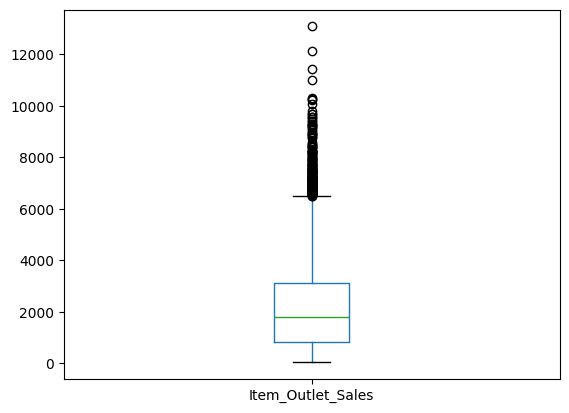

In [13]:
df.boxplot(column =['Item_Outlet_Sales'], grid = False)

In [14]:
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['Sales'] = df['Item_Outlet_Sales'].clip(lower=lower_bound, upper=upper_bound)

In [15]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,2879,...,0,0,0,1,0,0,1,0,0,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,1920,...,0,1,0,1,0,0,0,1,0,443.4228


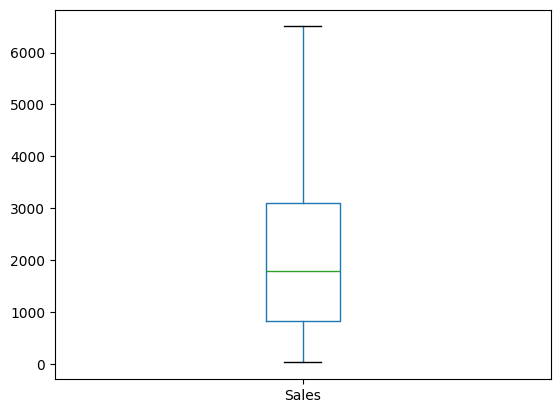

In [16]:
from matplotlib import pyplot as plt


df.boxplot(column =['Sales'], grid = False)

plt.show()

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_encoded,Item_Type_encoded,Item_Fat_Content_encoded_LF,Item_Fat_Content_encoded_REG,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,2180.352341,2180.819782,0.610231,0.352693,0.280183,0.326763,0.393054,0.109351,0.327702,0.280183,0.127068,0.654347,0.108882,0.109703,2156.313016
std,4.643456,0.051598,62.275067,8.371760,1706.499616,218.938401,117.576486,0.487726,0.477836,0.449115,0.469057,0.488457,0.312098,0.469403,0.449115,0.333069,0.475609,0.311509,0.312538,1624.863069
min,4.555000,0.000000,31.290000,1985.000000,33.290000,1777.000000,1926.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400,2013.000000,2132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000,2155.000000,2225.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,2331.000000,2277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,2910.000000,2374.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6501.869900


In [18]:
processed_columns = [
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Establishment_Year',
    'Item_Identifier_encoded',
 'Item_Type_encoded',
 'Item_Fat_Content_encoded_LF',
 'Item_Fat_Content_encoded_REG',
 'Item_Fat_Content_encoded_LF',
 'Item_Fat_Content_encoded_REG',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Size_High',
 'Outlet_Size_Medium',
 'Outlet_Size_Small',
 'Outlet_Type_Grocery Store',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3',
 'Sales'
]

In [20]:
df_processed = df[processed_columns]

In [21]:
df_processed.isnull().sum()

Item_Weight                      1463
Item_Visibility                     0
Item_MRP                            0
Outlet_Establishment_Year           0
Item_Identifier_encoded             0
Item_Type_encoded                   0
Item_Fat_Content_encoded_LF         0
Item_Fat_Content_encoded_REG        0
Item_Fat_Content_encoded_LF         0
Item_Fat_Content_encoded_REG        0
Outlet_Location_Type_Tier 1         0
Outlet_Location_Type_Tier 2         0
Outlet_Location_Type_Tier 3         0
Outlet_Size_High                    0
Outlet_Size_Medium                  0
Outlet_Size_Small                   0
Outlet_Type_Grocery Store           0
Outlet_Type_Supermarket Type1       0
Outlet_Type_Supermarket Type2       0
Outlet_Type_Supermarket Type3       0
Sales                               0
dtype: int64

In [22]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [23]:
df.to_csv("data/processed/train.csv", index=False)